<a href="https://colab.research.google.com/github/JoaoMarcelo99/data_science_portifolio/blob/master/Statistical_Exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The Problems

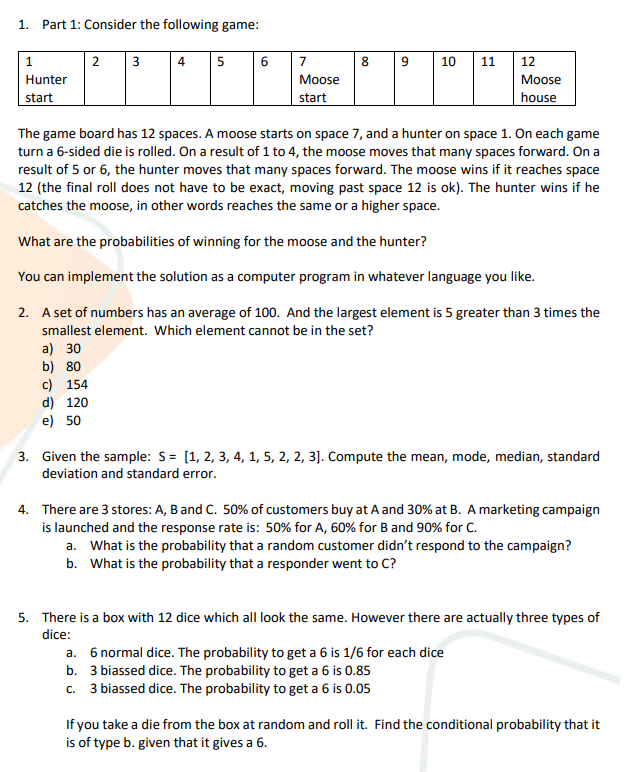

# 1) Probability of the Hunter or the Moose wins:
For this problem, I used a simple simulation of a match and ran multiple times to count how many wins the Hunter and the Moose had.

After that, I calculated the wins percentage of each one.

In [ ]:
from random import randint


class Player:
  def __init__(self,space):
    self.space = space
    self.wins = 0

  def move_foward(self, val):
    self.space = self.space + val
  
  def win(self):
    self.wins += 1

def check_victory(hunter, moose):
  if hunter.space >= moose.space:
    hunter.win()
    return True
    
  elif moose.space >= 12:
    moose.win()
    return True
  else:
    return False


def throw_dice(hunter, moose):
  val = randint(1,6)
  if val < 5:
    moose.move_foward(val)
  else:
    hunter.move_foward(val)


def calculate_results(hunter, moose):
  total_played_games = hunter.wins + moose.wins
  print("All played games: ",total_played_games)

  hunter_percentage_wins = (100*hunter.wins)/total_played_games
  moose_percentage_wins = (100*moose.wins)/total_played_games

  print("Hunter wins: ", hunter_percentage_wins, "%")
  print("Moose wins: ", moose_percentage_wins, "%")

  print("Someone wins: ", hunter_percentage_wins + moose_percentage_wins, "%")


def run_games(limit, hunter, moose):

  hunter_initial_space = hunter.space
  moose_initial_space = moose.space
  
  for i in range(1, limit): 
    hunter.space = hunter_initial_space
    moose.space = moose_initial_space
    while check_victory(hunter, moose) == False:
      throw_dice(hunter, moose)
      check_victory(hunter, moose)
  
  hunter.space = hunter_initial_space
  moose.space = moose_initial_space
  
  calculate_results(hunter, moose)
  
  hunter.wins = 0
  moose.wins = 0

In [ ]:
hunter = Player(1)
moose = Player(7)

run_games(1000000000, hunter, moose)

All played games:  1999999998
Hunter wins:  38.71853853871854 %
Moose wins:  61.28146146128146 %
Someone wins:  100.0 %


# 2) Which Element Cannot be in the Set?

For this problem we need to stipulate what are the greater and the lower values of the set. We know that the average of the set is 100, and the greater element (upper limit) has to be five greater than three times the smallest (lower limit).



We can put it in this way:

$x \leq 100 \leq X $;

$x = $ smallest element and $X = $ greater element

We know that $X = 5 + 3x$ by the definition of the problem. So we have:

$ x \leq 100 \leq 5 + 3x$

We can supose that the smallest value we have had to be less than 100, as 100 is the average, and we can't have the smallest element above the set average.

So, if 100 is the smallest element:

$100 \leq 5 + 3x$

And so

$100 \leq 5 + 3*100$

$100 \leq 305$

Which is true, but doesn't help us at all, since all options are under this value.

Let's do the opposite now. Let's supose that 100 is the greater value we can get.

$100 \leq 5 + 3x$

$100 - 5 \leq 3x$

$95/3 \leq x$

$31.6667 \leq x$

That is, the minimum value we can have, since the average is 100, is 31.667.

If we look at the options, we can see that the only alternative that is off the limits $(31.6667, 305)$ is the option a) 30.


# 3)Computing Statistics Proprieties of a Sample S:

To calculate the Mean of the sample:
$S = [1, 2, 3, 4, 1, 5, 2, 2, 3]$

We need to sum all elements and divide by the number of elements we have in this sample:

$\bar x =  \frac {\sum_{i=1}^{n}x_i}{n}$;

$n = $ size of the sample;

Making $ \bar x = \frac {1 + 2 +3 +4+1+5+2+2+3}{9}$ we conclude that $\bar x = 2.5555556$

To computate the Median we have to put the sample in sequence and pick the term in the middle. 

$S_M = [1,1,2,2,2,3,3,4,5]$

$Med = 2$ 

To calculate the Mode we need to get the value that most appears. In this case, as the sample we have is with only 9 elements, we can see that our Mode is 2.

To calculate the Standard Deviation we can use the following formula:

$s = \sqrt \frac {\sum_{i=1}^{n}(x_i - \bar x)^2}{n-1}$

$s = \frac {(1-2.5555556)^2 + (2-2.5555556)^2 +(3-2.5555556)^2 + (4-2.5555556)^2+ (1-2.5555556)^2 + (5-2.5555556)^2 + (2-2.5555556)^2 + (2-2.5555556)^2+ (3-2.5555556)^2}{8} $

And so

$s = 1.3333333$

Since the Variance is the Standard Deviation to the power of 2, we have that

$Var = s^2 = 1.777778$


And finally, the Standard Error is 

$SE = \frac {s}{\sqrt n}$

$SE = \frac {1.3333333}{\sqrt 9}$

$SE = 0.444443$

We can use Python functions to confirm our results.

In [ ]:
S = [1, 2, 3, 4, 1, 5, 2, 2, 3]

In [ ]:
import statistics as sts
import math 

print("Mean: ",sts.mean(S))
print("Median: ",sts.median(S))
print("Mode: ", sts.mode(S))
print("Standard Deviation: ", sts.stdev(S))
print("Variance: ", sts.variance(S))
print("Standard error: ", sts.stdev(S)/math.sqrt(len(S)))


Mean:  2.5555555555555554
Median:  2
Mode:  2
Standard Deviation:  1.3333333333333333
Variance:  1.7777777777777777
Standard error:  0.4444444444444444


#4) 3 Stores and the Marketing Campaign:

In this problem we have to answer two main questions. What is the probability that some random costumer didn't respond to the campaign and the probability that a responder went to the store C.

We know the response rate from each store. To get the "non-response" rate, we subtract 100% from that rate.

So we get $A = 50$%, $B = 40$% and $C = 10$%.

To know the probability of a random costumer didn't respond to the campaing, we need to compute the probability of the store that he or she goes and the "non-response" rate in that store.

So we get:

$50\% * 50\% + 30\% * 40\% + 20\% * 10\% = 49\%$

So there is a 49% chance of a random costumer didn't respond to the campaign.

To know the probability to a responder went to C, we need to computate the percentage that goes to C and see the response rate in that store.

As 50% of buyers go to A, and 30% go to B, the response rate in C has to be 20%. As the response rate in C is 90% we can calculate:

$20\% * 90\% = 18\% $

So, the probability of a responder went to C is 18%

#5) Box with dices:
To find the conditional probability that the dice is of type "B", given that it gives a 6, we need to use Bayes Theorem. 

The Bayes Theorem says:

$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$

Applying the theorem to the scope of our problem we have:

$P(Dice_B|6) = \frac{P(6|Dice_B)P(Dice_B)}{P(6)}$

Where $P(Dice_B)$ is the probability of dice B be taken from the box and $P(6)$ the probability of get a 6.

To get the full probability to get a 6, we need to consider all the cases for all types of dice that we have. For our case it will be:

$P(6) = P(6|Dice_A)P(Dice_A) + P(6|Dice_B)P(Dice_B) + P(6|Dice_C)P(Dice_C)$

So our conditional problem is

$P(Dice_B|6) = \frac{P(6|Dice_B)P(Dice_B)}{P(6|Dice_A)P(Dice_A) + P(6|Dice_B)P(Dice_B) + P(6|Dice_C)P(Dice_C)}$

Replacing with the values we have:

$P(Dice_B|6) = \frac{(0.85 * \frac{1}{4})}{(\frac{1}{6}*\frac{1}{2}) + (0.85*\frac{1}{4}) + (0.05*\frac{1}{4})}$


Which gives us $P(Dice_B|6) = 68.92$%